In [1]:
import hytek_exctractor

result_df = hytek_exctractor.extract_hytek_results('result_pdfs','carifta_2025_results.csv')

0 A.S.A.T.T. - Open LC Championship - Organization License HY-TEK's MM 8.0 - 2:11 PM 23/04/2025 Page 1
XXXVIII Carifta 2025 Aquatic Championships - 19/04/2025 to 22/04/2025
Results

1 Event 1 Girls 13-14 800 LC Meter Freestyle
Carifta: 9:11.81 30/03/2024 Heidi Stoute BAR
Name Age Team Seed Time Finals Time
1 Uszenski, Reagan 13 Virgin Islands Swimming 9:38.89 9:22.27
r:+0.67 30.20 1:03.12 1:37.72 2:12.04 2:46.91 3:21.85 3:57.45 4:32.79
5:44.03 6:20.01 6:55.82 7:31.66 8:07.55 8:43.64 9:22.27
2 Martinez, Marena 13 Trinidad & Tobago 9:46.17 9:49.52
r:+0.68 33.67 1:11.27 1:49.80 2:29.24 3:08.53 3:48.04 4:27.61 5:07.24
5:47.03 6:26.76 7:06.36 7:45.75 8:25.01 9:04.31 9:43.06 9:49.52
3 Persico, Zara 13 Trinidad & Tobago 9:54.23 9:53.57
31.65 1:07.23 2:21.30 3:36.14 4:51.92
6:08.86 7:26.09 8:40.53 9:53.57
4 McKenzie, Dndn F 14 Bahamas 10:03.47 10:02.06
32.07 1:07.65 1:44.08 2:21.73 2:59.43 3:37.93 4:16.25 4:54.94
5:33.73 6:12.55 6:51.21 7:30.07 8:08.18 8:47.07 9:24.94 10:02.06
5 McIntyre, Lail

/Users/luisweekes/Documents/Swimming/SOFT_DEV/Hytek_PDF_to_DF/hytek_exctractor.py:103: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(')') if isinstance(x, str) else x)
/Users/luisweekes/Documents/Swimming/SOFT_DEV/Hytek_PDF_to_DF/hytek_exctractor.py:103: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(')') if isinstance(x, str) else x)
/Users/luisweekes/Documents/Swimming/SOFT_DEV/Hytek_PDF_to_DF/hytek_exctractor.py:103: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(')') if isinstance(x, str) else x)
/Users/luisweekes/Documents/Swimming/SOFT_DEV/Hytek_PDF_to_DF/hytek_exctractor.py:103: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.rstrip(')') if isinstance(x, str) else x)
/Users/luisweekes/Documents/Swim

178 Event 77 Boys 15-17 50 LC Meter Breaststroke)
Name Age Team Seed Time Prelim Time
8 Hilton, Dominic W 17 Cayman Islands-ZZ 31.37 30.94 q
r:+0.64
9 Davis, Benjamin 17 Jamaica 31.08 30.95
r:+0.66
10 Clark-Terrell, Jack L 16 Cayman Islands-ZZ 31.48 31.20
r:+0.57
11 Bernard, Anpherne 16 Trinidad & Tobago 30.71 31.38
r:+0.52
12 Patron, Lucas 16 Martinique 31.45 31.87
r:+0.65
13 Hazell, Ethan 17 St. Lucia National Team 33.50 32.12
r:+0.57
14 George, Brandon 17 St Vincent Swim Team 33.31 32.36
r:+0.52
15 Anthony, Xylan D 15 Aruba 32.16 32.37
r:+0.60
16 Croes, Ian 16 Aruba 33.60 32.39
r:+0.59
17 Holtuin, Hasan 16 Suriname 33.30 32.61
r:+0.55
18 Anthony, Zachary 17 Trinidad & Tobago 31.77 32.79
r:+0.62
19 Charles, Karic 17 St. Lucia National Team 33.96 33.03
r:+0.57
20 Sindhi, Jai 16 Antigua Barbuda National Team 33.86 33.11
r:+0.65
21 Gardiner, Ethan 16 Turks And Caicos Islands 34.36 33.97
r:+0.55
22 Ballah, Matthew 16 St Vincent Swim Team 34.79 34.14
r:+0.58
23 van der Giessen, Tim 16 Bon

In [2]:
print(result_df.head())

     Name Age                     Team Seed Time Performance Time  \
0  Reagan  13  Virgin Islands Swimming   9:38.89          9:22.27   
1  Marena  13        Trinidad & Tobago   9:46.17          9:49.52   
2    Zara  13        Trinidad & Tobago   9:54.23          9:53.57   
3  Dndn F  14                  Bahamas  10:03.47         10:02.06   
4  Lailah  13       Barbados Swim Team  10:46.29         10:14.26   

                                EVENT EVENT_NUM GENDER AGE_GROUP DISTANCE  \
0  Girls 13-14 800 LC Meter Freestyle         1  Girls     13-14      800   
1  Girls 13-14 800 LC Meter Freestyle         1  Girls     13-14      800   
2  Girls 13-14 800 LC Meter Freestyle         1  Girls     13-14      800   
3  Girls 13-14 800 LC Meter Freestyle         1  Girls     13-14      800   
4  Girls 13-14 800 LC Meter Freestyle         1  Girls     13-14      800   

      STROKE DISTANCEXSTROKE AGE_GROUPXGENDER  \
0  Freestyle    800Freestyle       13-14Girls   
1  Freestyle    800Frees

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
print(result_df['Team'].unique())

['Virgin Islands Swimming' 'Trinidad & Tobago' 'Bahamas'
 'Barbados Swim Team' 'Aruba' 'Cayman Islands-ZZ'
 'Grenada National Swim Team' 'Antigua Barbuda National Team' 'Martinique'
 'Team Guadeloupe' 'Jamaica' 'Bermuda Swim Team' 'Suriname'
 'St Vincent Swim Team' 'Turks And Caicos Islands' 'Anguilla' 'Bonaire'
 'Sint Maarten' 'Curacao Aquatic Association' 'Haiti' 'Guyana'
 'Belize Aquatics Federation-ZZ' 'Jamaica A' 'Cayman Islands-ZZ A'
 'Bahamas A' 'Trinidad & Tobago A' 'Martinique A' 'Aruba A'
 'Barbados Swim Team A' 'Virgin Islands Swimming NT']


In [5]:
bim_results = result_df[(result_df['Team']== 'Barbados Swim Team') | (result_df['Team'] == 'Barbados Swim Team A')].reset_index(drop=True)
print(bim_results.head())
bim_results.to_csv('barbados_carifta_2025.csv', )

       Name Age                Team Seed Time Performance Time  \
0    Lailah  13  Barbados Swim Team  10:46.29         10:14.26   
1     Naomi  14  Barbados Swim Team  10:16.41         10:29.45   
2     Heidi  15  Barbados Swim Team   9:11.81          9:18.93   
3  Isabella  15  Barbados Swim Team   9:57.72          9:59.71   
4    Mihael  13  Barbados Swim Team  17:57.49         18:05.88   

                                EVENT EVENT_NUM GENDER AGE_GROUP DISTANCE  \
0  Girls 13-14 800 LC Meter Freestyle         1  Girls     13-14      800   
1  Girls 13-14 800 LC Meter Freestyle         1  Girls     13-14      800   
2  Girls 15-17 800 LC Meter Freestyle         1  Girls     15-17      800   
3  Girls 15-17 800 LC Meter Freestyle         1  Girls     15-17      800   
4  Boys 13-14 1500 LC Meter Freestyle         2   Boys     13-14     1500   

      STROKE DISTANCEXSTROKE AGE_GROUPXGENDER  \
0  Freestyle    800Freestyle       13-14Girls   
1  Freestyle    800Freestyle       13-14Gi

# Notes on what to look at: 

1. FINALS VS Total # swims

2. Number of Finals Appearances by Age and gender, both

3. Medals by Age and gender, both. 

4. number of Finalists by stroke (Age and gender, both)

5. Average Time drop from seed to performance Age and gender, both

# 1. Finals / # swimmers

In [6]:
finals_df = bim_results[(bim_results['SWIM_TYPE'] == 'Finals') & (bim_results['PLACE'] <= 8) ]
finals_by_age_gender = finals_df.groupby('AGE_GROUPXGENDER').size()
print(finals_by_age_gender)
# number of swimmers

age_group_gender_swims_df = bim_results.groupby('AGE_GROUPXGENDER').size()
print(age_group_gender_swims_df)

finals_over_swims_df = finals_by_age_gender.values / age_group_gender_swims_df.values


AGE_GROUPXGENDER
11-12Boys     11
11-12Girls    13
13-14Boys      9
13-14Girls     7
15-17Boys      4
15-17Girls    14
dtype: int64
AGE_GROUPXGENDER
11-12Boys     32
11-12Girls    37
13-14Boys     26
13-14Girls    24
15-17Boys     13
15-17Girls    36
dtype: int64


# 2. Number of Finals Appearances

AGE_GROUP
11-12    24
13-14    16
15-17    18
dtype: int64


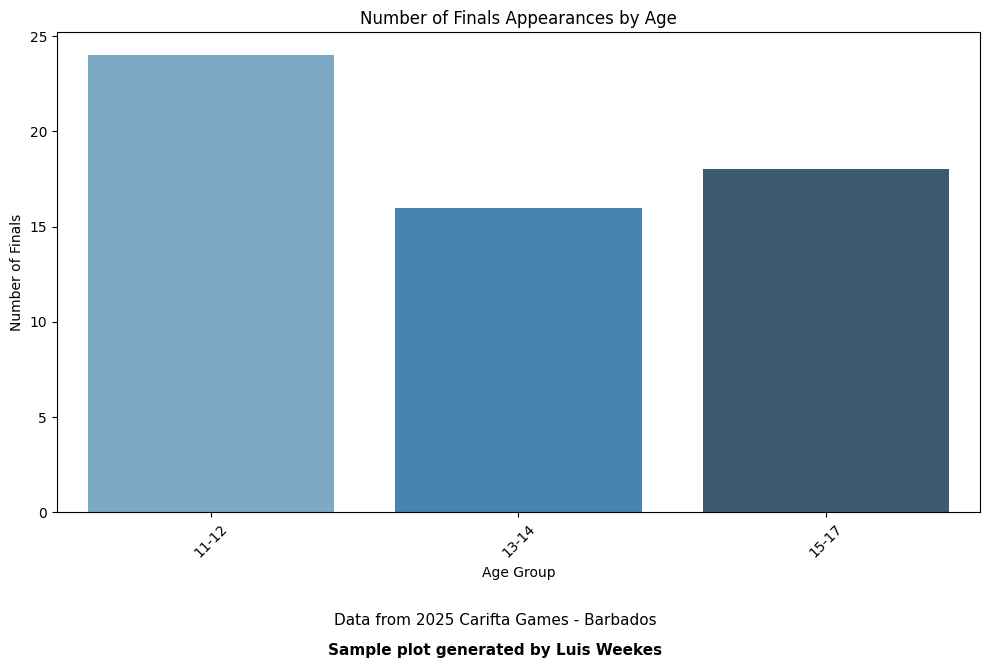

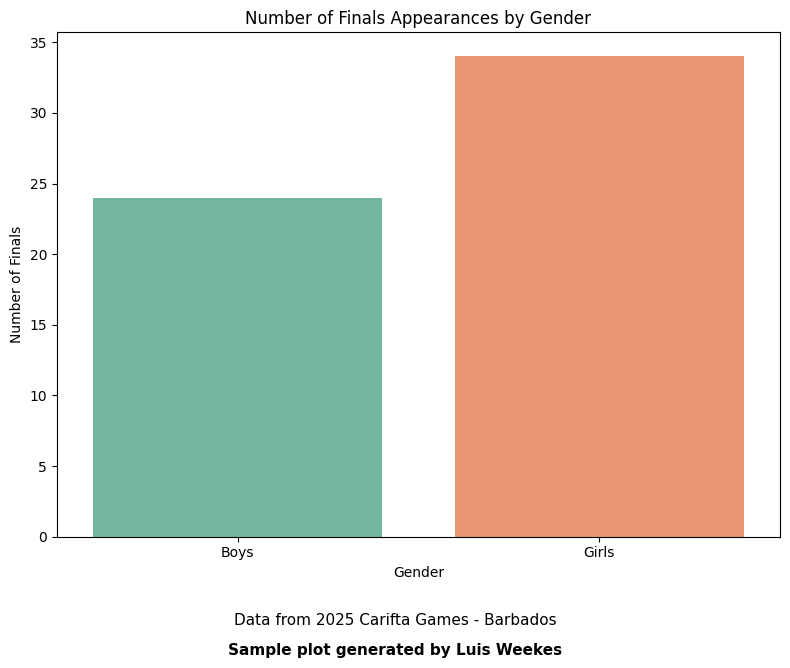

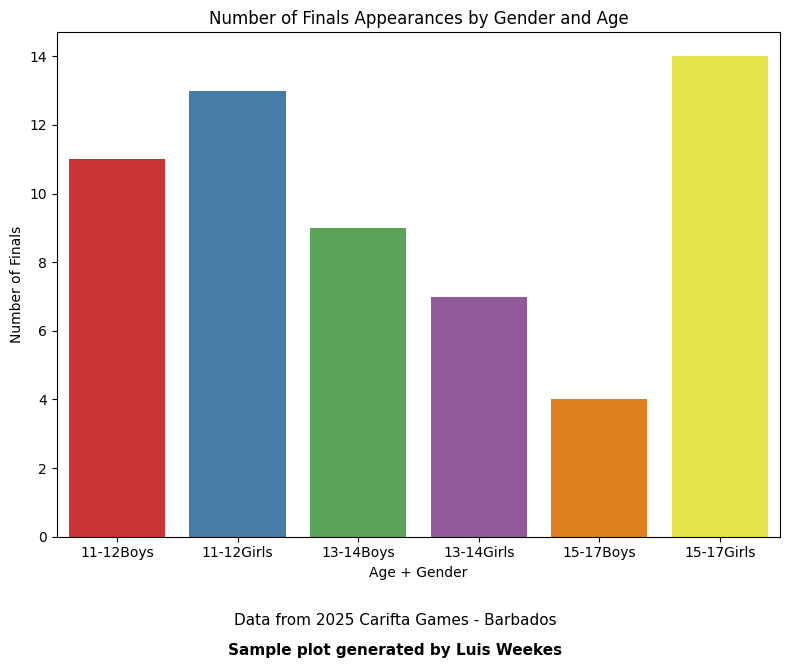

In [28]:
finals_df = bim_results[(bim_results['SWIM_TYPE'] == 'Finals') & (bim_results['PLACE'] <= 8) ]

finals_by_age = finals_df.groupby('AGE_GROUP').size()
print(finals_by_age)
finals_by_gender = finals_df.groupby('GENDER').size()
finals_by_age_gender = finals_df.groupby('AGE_GROUPXGENDER').size()


plt.figure(figsize=(10, 6))
sns.barplot(x=finals_by_age.index, y=finals_by_age.values, palette= "Blues_d", hue= finals_by_age.index)
plt.title('Number of Finals Appearances by Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Finals')
plt.xticks(rotation=45)
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=11)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x=finals_by_gender.index, y=finals_by_gender.values, palette="Set2", hue = finals_by_gender.index)
plt.title('Number of Finals Appearances by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Finals')
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=11)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.barplot(x=finals_by_age_gender.index, y=finals_by_age_gender.values, palette="Set1", hue= finals_by_age_gender.index)
plt.title('Number of Finals Appearances by Gender and Age')
plt.xlabel('Age + Gender')
plt.ylabel('Number of Finals')
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=11)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.tight_layout()
plt.show()


# 3. Medals

In [27]:
df_check = bim_results[['PLACE','Name','SWIM_TYPE', 'EVENT','AGE_GROUP']]
pd.set_option('display.max_rows', None)

df_check.to_csv('sanity_check.csv')

     PLACE                              Name SWIM_TYPE
2        1                             Heidi    Finals
13       2                            Joshua    Finals
15       1                             Kaija    Finals
20       3                              Theo    Finals
31       1                             Kaija    Finals
46       3                            Mihael    Finals
48       1                             Heidi    Finals
52       1                             Kaija    Finals
64       1                             Kaija    Finals
68       1                              Theo    Finals
73       3                            Mihael    Finals
86       1                             Heidi    Finals
88       1                             Kaija    Finals
115      1                             Heidi    Finals
119      1                             Kaija    Finals
120      3                         Gabriella    Finals
127      2                             Jaiya    Finals
131      1

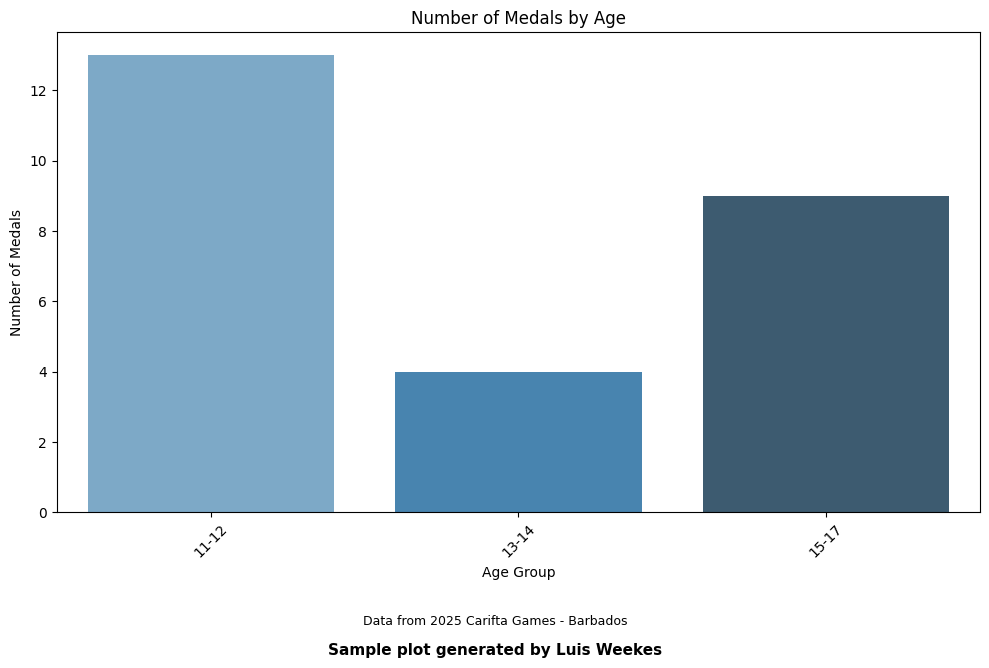

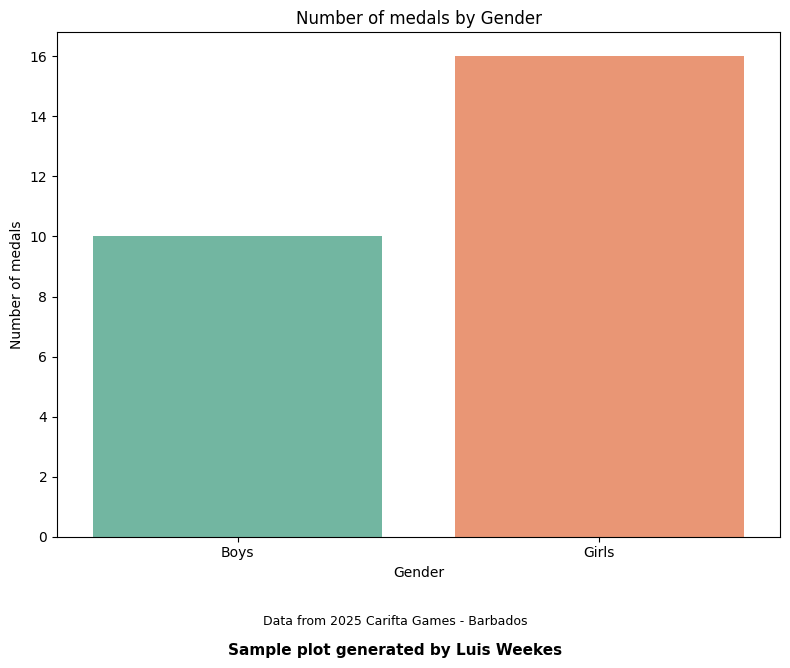

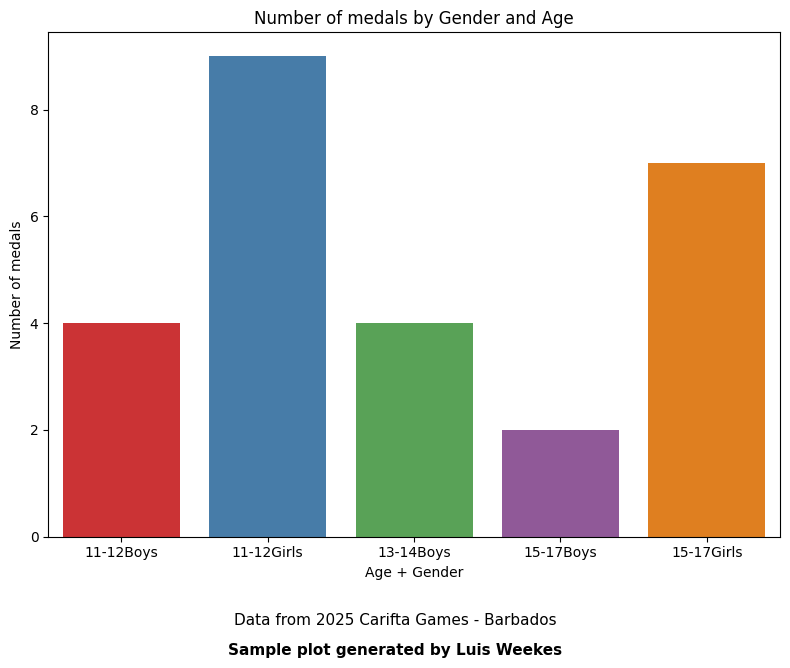

In [9]:
medals_df = bim_results[(bim_results['SWIM_TYPE'] == 'Finals') & (bim_results['PLACE'] <= 3)]
print(medals_df[['PLACE','Name','SWIM_TYPE']])
medals_by_age = medals_df.groupby('AGE_GROUP').size()
medals_by_gender = medals_df.groupby('GENDER').size()
medals_by_age_gender = medals_df.groupby('AGE_GROUPXGENDER').size()


plt.figure(figsize=(10, 6))
sns.barplot(x=medals_by_age.index, y=medals_by_age.values, palette="Blues_d", hue=medals_by_age.index, legend=False)
plt.title('Number of Medals by Age')
plt.xlabel('Age Group')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=9)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=medals_by_gender.index, y=medals_by_gender.values, palette="Set2", hue=medals_by_gender.index, legend=False)
plt.title('Number of medals by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of medals')
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=9)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=medals_by_age_gender.index, y=medals_by_age_gender.values, palette="Set1", hue=medals_by_age_gender.index, legend=False)
plt.title('Number of medals by Gender and Age')
plt.xlabel('Age + Gender')
plt.ylabel('Number of medals')
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=11)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.tight_layout()
plt.show()



# 4. Finalists

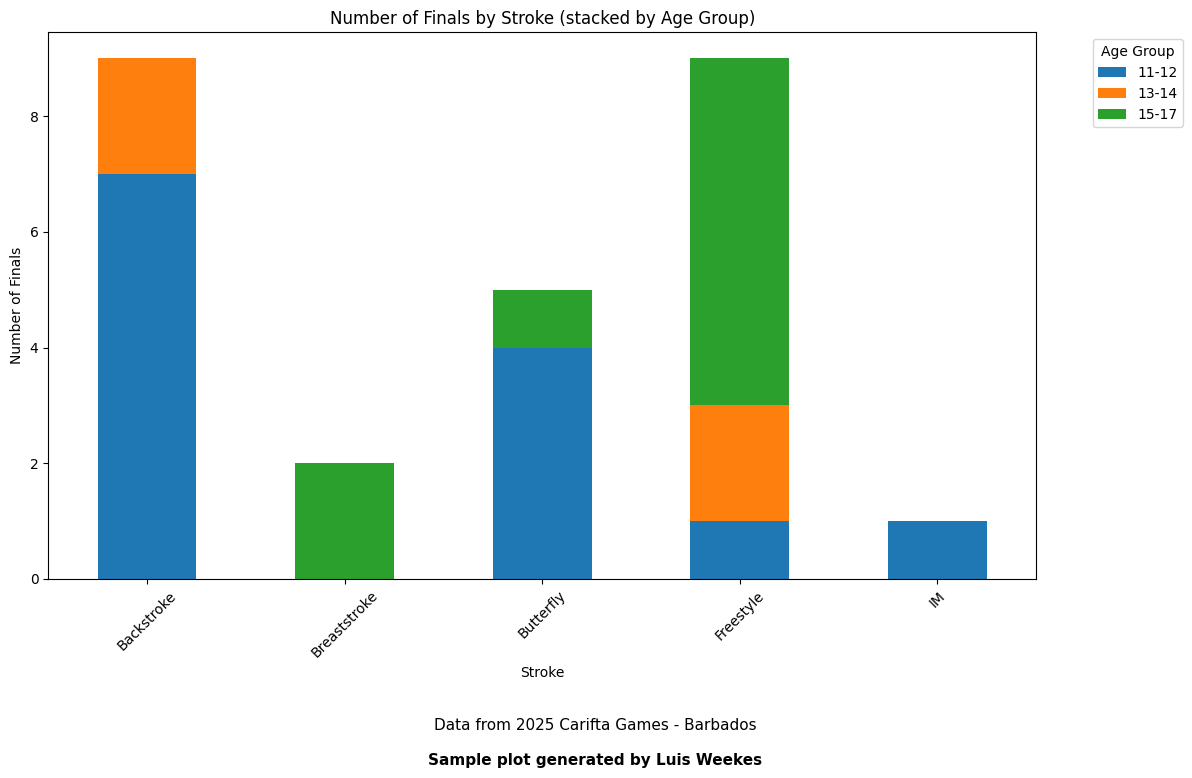

In [10]:
import matplotlib.pyplot as plt

# 1. Filter only Finals swims
finals_df = bim_results[(bim_results['SWIM_TYPE'] == 'Finals') & (bim_results['PLACE'] <=3)]

# 2. Group by Stroke and Age Group
finals_by_stroke_age = finals_df.groupby(['STROKE', 'AGE_GROUP']).size().unstack(fill_value=0)

# 3. Plot Stacked Bar
finals_by_stroke_age.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Number of Finals by Stroke (stacked by Age Group)')
plt.xlabel('Stroke')
plt.ylabel('Number of Finals')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=11)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.tight_layout()
plt.show()


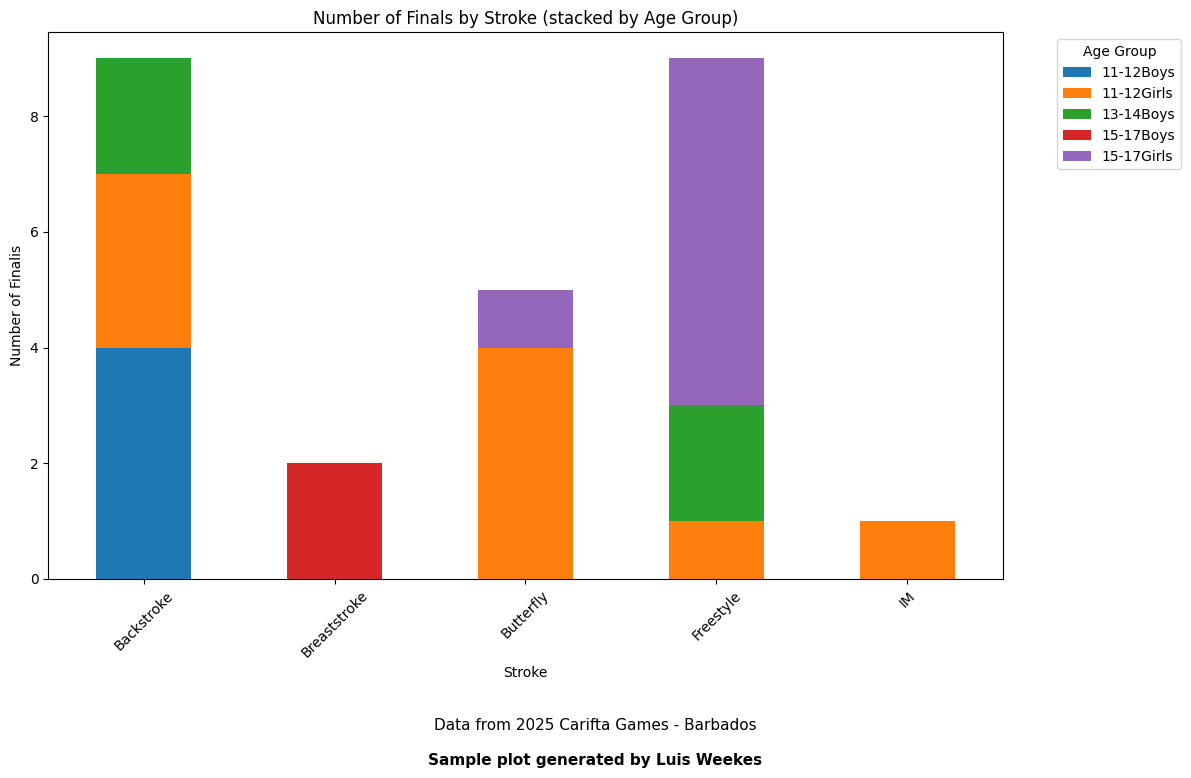

In [11]:
import matplotlib.pyplot as plt

# 1. Filter only Finals swims
finals_df = bim_results[(bim_results['SWIM_TYPE'] == 'Finals') & (bim_results['PLACE'] <=3)]

# 2. Group by Stroke and Age Group
finals_by_stroke_age = finals_df.groupby(['STROKE', 'AGE_GROUPXGENDER']).size().unstack(fill_value=0)

# 3. Plot Stacked Bar
finals_by_stroke_age.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Number of Finals by Stroke (stacked by Age Group)')
plt.xlabel('Stroke')
plt.ylabel('Number of Finalis')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=11)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.tight_layout()
plt.show()


# 5. Time Drop

AGE_GROUPXGENDER
11-12Boys    -1.215197
11-12Girls    0.024091
13-14Boys    -0.663948
13-14Girls    0.304412
15-17Boys     0.382466
15-17Girls    0.069988
Name: PCT_DROP_GAIN, dtype: float64


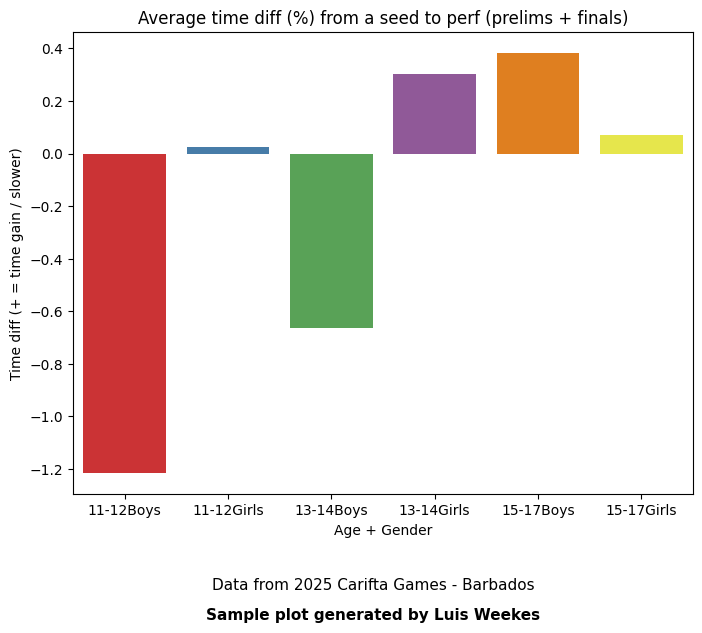

In [12]:
av_time_drop = bim_results.groupby('AGE_GROUPXGENDER')['PCT_DROP_GAIN'].mean()
print(av_time_drop)

plt.figure(figsize=(8, 6))
sns.barplot(x=av_time_drop.index, y=av_time_drop.values, palette="Set1", hue= av_time_drop.index)
plt.title('Average time diff (%) from a seed to perf (prelims + finals)')
plt.xlabel('Age + Gender')
plt.ylabel('Time diff (+ = time gain / slower)')
plt.figtext(0.5, -0.05, "Data from 2025 Carifta Games - Barbados", ha="center", fontsize=11)
plt.figtext(0.5, -0.1, "Sample plot generated by Luis Weekes", ha="center", fontsize=11, fontweight = 'bold')
plt.show()